### Task 1 : Prediction using Supervised ML

Data Science and Business Analytics Intern

GRIP April'21

**Predict the percentage of an student based on the no. of study hours**
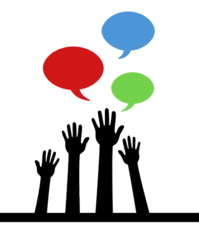

***By Sanchi Arora***

Importing necessary Libraries : 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#Reading the text file
df =pd.read_csv('Task 1.txt', delimiter = ",")
df.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Here, In this dataset we have only two variables, let us find whether they have any relationship between or not !!!
 - Through dynamic Visualizations, we can have insights about the data. 
 - We used 'pyecharts' Library for ***Live- Visuals***

In [3]:
#!pip install pyecharts
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.charts import EffectScatter
from pyecharts.globals import SymbolType
from pyecharts import options as opts

In [4]:
c = (
 EffectScatter()
 .add_xaxis(df['Hours'])
 .add_yaxis('Hours v/s Percentage', df['Scores'],is_selected = True,symbol_size = 10)
 )
c.render_notebook()

**From this graph, we could estimate that there is a positive linear relation between the 'number of hours studied' and 'percentage of score'. But, for pretty more understandings, Let us find the correlation between variables.**

In [5]:
corr = df.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


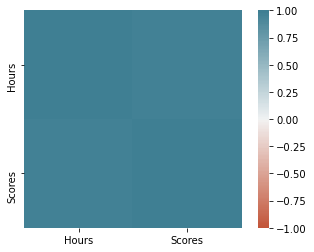

In [6]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

**From this heatmap, we can easily analyse the strong positive correlation. Here, Blue Color signifies that these are strongly related to each other.**

## Data Preprocessing

- Divide the data into "attributes" (inputs) and "labels" (outputs)

In [7]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

- Split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42) 

## Training the Model

- Using 'LinearRegression()', train the Model

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

- Plotting the regression line which would be the best fit for test data

Text(0, 0.5, 'Score')

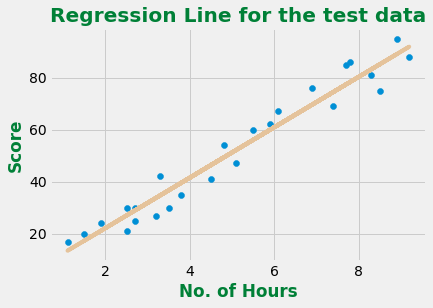

In [10]:
from matplotlib import style
style.use('fivethirtyeight')
txt = {'weight':'bold', 'color' : '#008037'}
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color ='#e5c39b');
plt.title('Regression Line for the test data', fontdict = txt)
plt.xlabel('No. of Hours', fontdict = txt)
plt.ylabel('Score', fontdict = txt)

- check the model performance on test data

In [11]:
y_pred = regressor.predict(X_test) # Predicting the scores
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


- Check how accurately our model is predicting by determining 'accuracy', 'r2_score'.

In [12]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("r2_score: ",score)
print("Traing Score: ",regressor.score(X_train, y_train))
print("Testing Score: ",regressor.score(X_train, y_train))

r2_score:  0.9678055545167994
Traing Score:  0.9491209376364416
Testing Score:  0.9491209376364416


- Evaluate the performance of model, compare how well different algorithms perform on a particular dataset.
- By calculating the 'Mean_absolute_error', 'Mean_squared_error', 'Root Mean Squared Error'

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean_absolute_error :",mean_absolute_error(y_test,y_pred))
print("Mean_squared_error :", mean_squared_error(y_test,y_pred))
print("Root_Mean_Squared_Error:", np.sqrt(mean_absolute_error(y_test, y_pred)))

Mean_absolute_error : 3.9207511902099244
Mean_squared_error : 18.943211722315272
Root_Mean_Squared_Error: 1.9800886824104431


**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [14]:
hours = 9.25
# predicting the value using regressor
self_prediction = regressor.predict(np.array([hours]).reshape(-1,1))
print("Number of Hours ={} \nPredicted Score ={}".format(hours,self_prediction[0]))

Number of Hours =9.25 
Predicted Score =92.38611528261494


**Conclusion :** If a Student studies for 9.25 hours, A student would get nearby 92 scores.